
**Decision Tree Classifier : ID3**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
# load the iris datasets
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df["target"].value_counts()


target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

**Check the missing values**

In [11]:
df.apply(lambda x:sum(x.isnull()))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

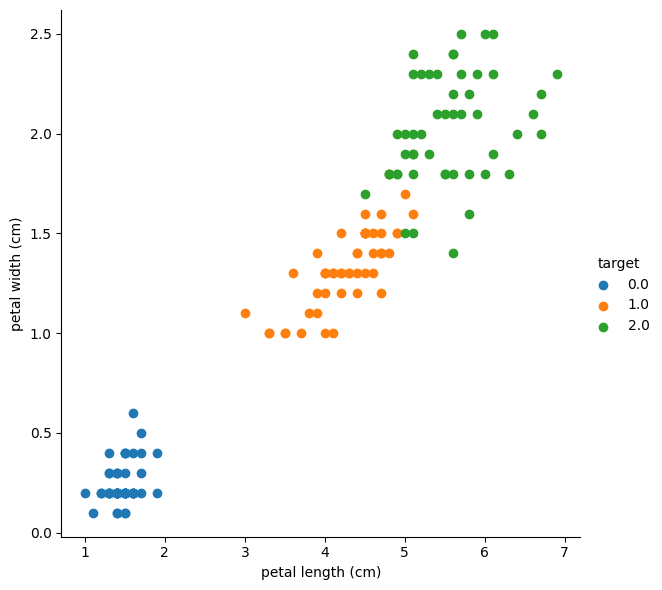

In [15]:
sns.FacetGrid(df, hue="target",height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()


**Splitting the data and Defining Decision Tree Algorithm**

In [40]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing sets
X=df.drop('target',axis=1)
Y=df['target']
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2)

#defining(training) the decision tree
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)  # for ID3
#model=DecisionTreeClassifier()  // for CART
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
model.score(iris.data, iris.target)

0.9933333333333333

**Make predictions**

In [43]:
expected = iris.target
predicted = model.predict(iris.data)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


**Summarize the fit of the model**

In [44]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


**Visualizing the Decision Tree**

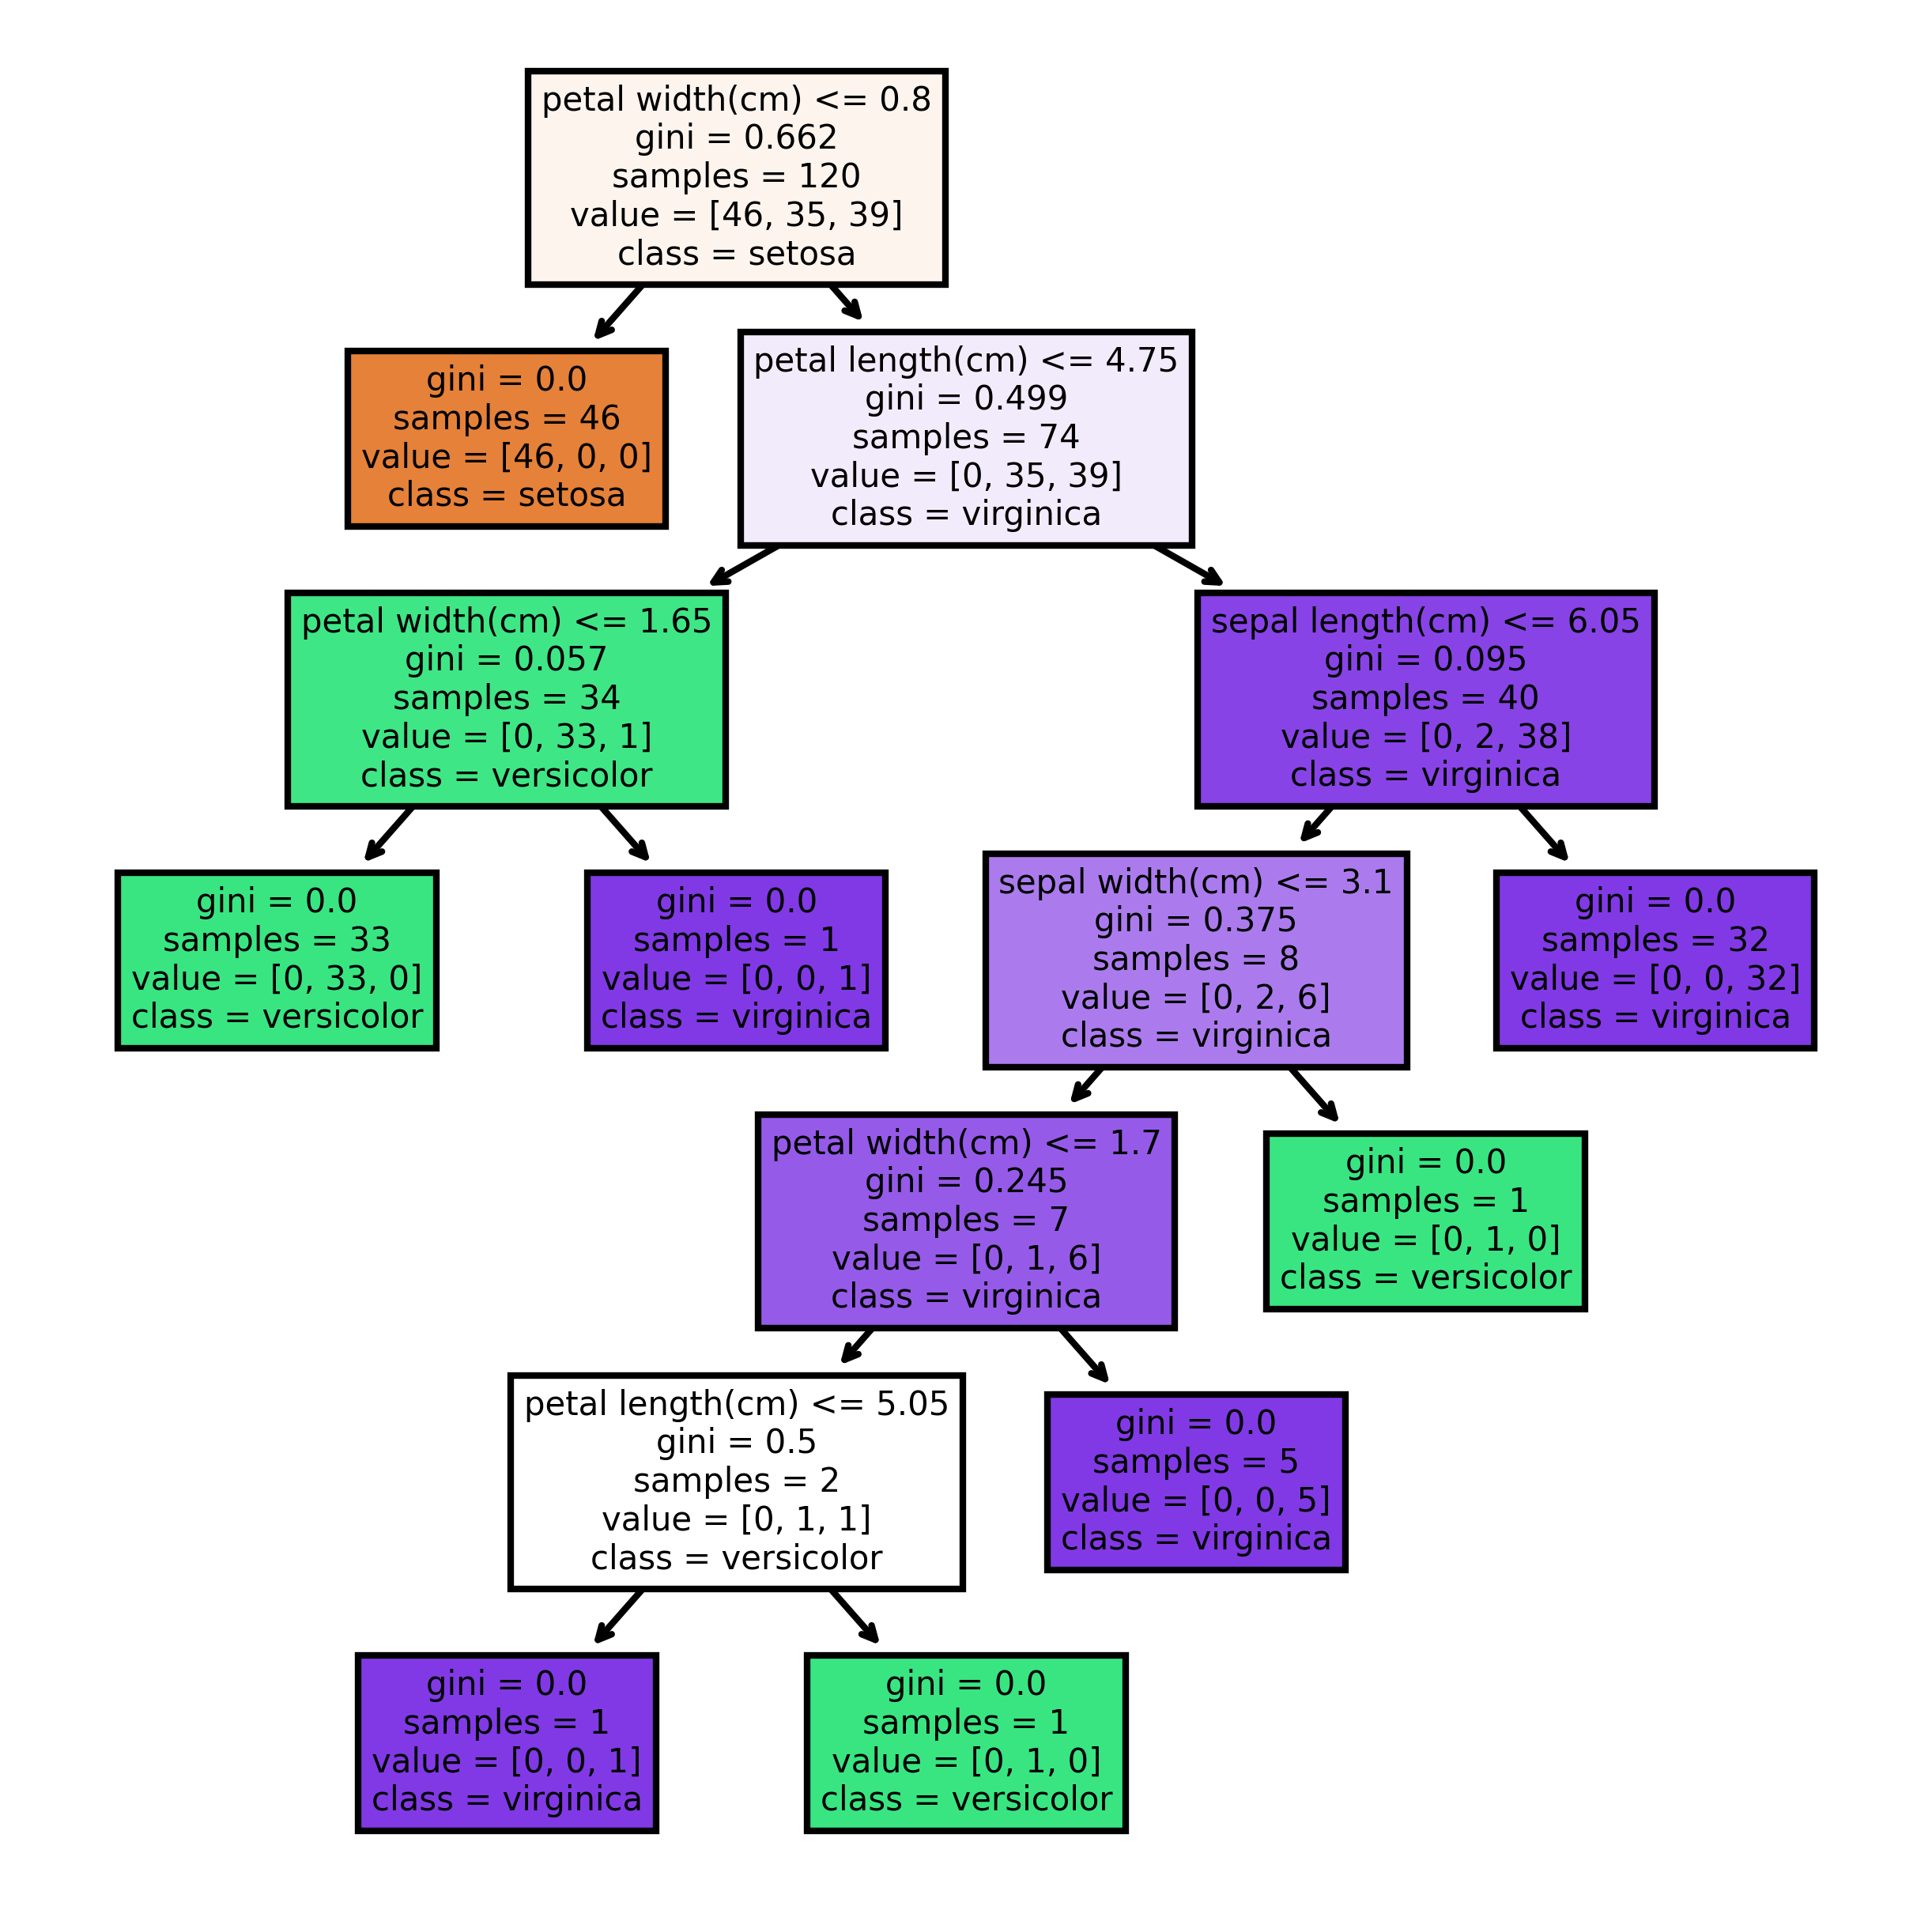

In [45]:
from sklearn import tree
names=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
classes=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=600)
tree.plot_tree(dtree,feature_names=names,class_names=classes,filled=True);

**Predicting Species for a set of values**

In [46]:
X_new = [[6.3,3.0,1.3,0.2]]

In [50]:
species = model.predict(X_new)
# "setosa": 0, "versicolor": 1, "virginica": 2
if species==0:
    print ("setosa")
elif species==1:
    print("versicolor")  
else:
    print("virginica")      

[0.]
setosa
